In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 7.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/Articles.csv', encoding='latin-1')
df.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [4]:
df['NewsType'].unique()

array(['business', 'sports'], dtype=object)

In [5]:
embeddings = {}

In [6]:
with open('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/glove.6B/glove.6B.300d.txt') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:])
    embeddings[word] = vectors

In [7]:
import re
import tqdm
import nltk
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import contractions
from tqdm.notebook import tqdm
tqdm.pandas()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
stop_words_en=stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
def vectorize(texto):
  vector_size = 300 #definir tamaño de vector
  #hacer todo minuscua
  texto=texto.lower()
  #arreglamos contracciones
  texto = contractions.fix(texto)
  #regex
  texto = re.sub(r'[^a-zA-Z\s]','', texto)
  #tokenizar
  texto_tokenized = word_tokenize(texto)
  #eliminar stiowords
  texto_no_stop = [token for token in texto_tokenized if token not in stop_words_en]
  #lematizar
  final = [lemmatizer.lemmatize(word) for word in texto_no_stop]

  #generar vector
  # Fixed: Changed 'np.xers' to 'np.zeros' to initialize the vector with zeros
  vector = np.zeros(vector_size)

  for palabra in final:
    if palabra in embeddings:
      vector = vector + embeddings[palabra].astype(float)
    vector = vector.reshape(1,-1)[0]
    return vector

In [9]:
vectorize('this is test')

array([ 2.6640e-02,  7.3666e-01,  1.4519e-01, -1.2378e+00, -7.8431e-02,
        1.1878e-01,  1.1072e-01, -5.7459e-01, -5.0329e-01, -2.0694e+00,
        5.6273e-01, -6.5392e-02,  2.6165e-01, -2.9559e-01, -1.3630e-01,
        6.6476e-01,  1.1782e-01,  8.5784e-02, -3.1630e-01, -4.7456e-01,
       -3.1628e-01, -6.1258e-01,  1.6968e-01,  2.9080e-01,  1.5166e-02,
        1.9775e-01,  2.6749e-01,  1.0875e-01, -8.6687e-02, -5.8117e-01,
        1.9078e-02, -3.5914e-01, -2.6973e-01, -7.0312e-02, -7.1556e-01,
        1.1675e-01, -5.7603e-01,  2.2745e-01, -5.4766e-01,  1.5907e-01,
        3.0659e-01,  3.1730e-01,  1.1656e-01, -1.0250e-01,  1.1470e-03,
       -2.2274e-01, -5.3550e-01, -4.3364e-01, -2.0306e-01, -3.5997e-01,
        3.5991e-01, -2.0668e-01,  1.4845e-01,  7.7065e-02,  5.2591e-02,
        3.8939e-01,  9.9486e-02, -5.3198e-01, -1.0236e-01,  3.1587e-01,
        2.4825e-01, -3.3952e-01,  8.6676e-02, -3.4517e-01,  4.2221e-01,
        3.3158e-01,  3.3441e-01, -3.4035e-01,  4.9647e-02,  4.55

In [10]:
df['vector'] = df['Article'].progress_apply(vectorize)

  0%|          | 0/2692 [00:00<?, ?it/s]

In [11]:
df.head()

,Article,Date,Heading,NewsType,vector
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,"[0.29405, -0.27778, 0.29024, -0.1891, -0.54151..."
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"[-0.28105, -0.98823, 0.030071, -0.0019631, -0...."
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,"[-0.28105, -0.98823, 0.030071, -0.0019631, -0...."
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,"[-0.28105, -0.98823, 0.030071, -0.0019631, -0...."
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,"[-0.62333, -0.42434, -0.035321, -0.026693, 0.2..."


In [12]:
def buscar_documentos(documento_original,n):
  data = {
      'Article':[],
      'sims':[]
  }
  buscar = vectorize(documento_original)
  A = buscar
  for vector, headline in zip(df['vector'], df['Article']):
    B = vector
    try:
      resultado = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
    except:
      resultado = 0

    data['Article'].append(headline)
    data['sims'].append(resultado)

    final = pd.DataFrame(data).sort_values(by='sims',ascending=False).head(n)
  return final

In [13]:
buscar_documentos('Asiam markets plummet',n=15)

<ipython-input-12-a0cd72a0ccf2>:11: RuntimeWarning: invalid value encountered in scalar divide
  resultado = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))


,Article,sims
0,KARACHI: The Sindh government has decided to b...,NaN
1,HONG KONG: Asian markets started 2015 on an up...,NaN
2,HONG KONG: Hong Kong shares opened 0.66 perce...,NaN
3,HONG KONG: Asian markets tumbled Tuesday follo...,NaN
4,NEW YORK: US oil prices Monday slipped below $...,NaN
5,New York: Oil prices tumbled Tuesday to fresh ...,NaN
6,KARACHI: Strong bulls on Friday pulled the ben...,NaN
7,"Singapore: Oil fell further in Asia Monday, wi...",NaN
8,KARACHI: Wholesale market rates for sugar drop...,NaN
9,SYDNEY: Oil prices fell 1 percent on Wednesday...,NaN


In [14]:
buscar_documentos('real madrid',n=15)

<ipython-input-12-a0cd72a0ccf2>:11: RuntimeWarning: invalid value encountered in scalar divide
  resultado = np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))


,Article,sims
2206,MADRID: A bullfighter and a man participating ...,0.497259
2505,After the success of its Great Online Shoppin...,0.385346
1630,BARCELONA: Barcelona´s stuttering title bid su...,0.378027
2207,Barcelona have launched a campaign in support ...,0.378027
1772,Sevilla conjured up a dazzling comeback to cli...,0.366944
1780,Brazilian veteran Kaka is the highest paid pla...,0.321438
1788,Manchester United substitute Jesse Lingard's s...,0.305861
2310,MANCHESTER: Moeen Ali took two wickets as Eng...,0.305861
2312,MANCHESTER: James Anderson struck twice on his...,0.305861
2301,MANCHESTER: Joe Root powered past 200 as Engla...,0.305861


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [18]:
X = df['vector']
X = np.concatenate(X, axis=0).reshape(-1,300)
y = df['NewsType']

X_test,X_train, y_test, y_train = train_test_split(X,y,
                                                    train_size=0.7,
                                                    random_state=101)

In [19]:
modelo = RandomForestClassifier()
modelo.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
y_pred = modelo.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    business       0.57      0.95      0.71       875
      sports       0.90      0.38      0.53      1009

    accuracy                           0.64      1884
   macro avg       0.74      0.67      0.62      1884
weighted avg       0.75      0.64      0.62      1884



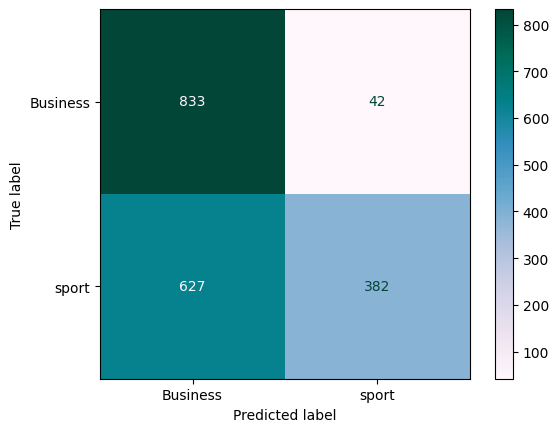

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
target_names = ['Business','sport']
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels= target_names, cmap='PuBuGn')

In [31]:
from sklearn.manifold import TSNE

X=df['vector']
X = np.concatenate(X, axis=0).reshape(-1,300)

modelo=TSNE(n_components=2)
resultado=modelo.fit_transform(X)

df['tsne_1']=resultado[:,0]
df['tsne_2']=resultado[:,1]

df.head()

,Article,Date,Heading,NewsType,vector,tsne_1,tsne_2
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,"[0.29405, -0.27778, 0.29024, -0.1891, -0.54151...",-116.456009,83.387764
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"[-0.28105, -0.98823, 0.030071, -0.0019631, -0....",36.178055,-116.155922
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,"[-0.28105, -0.98823, 0.030071, -0.0019631, -0....",36.178055,-116.155922
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,"[-0.28105, -0.98823, 0.030071, -0.0019631, -0....",36.178055,-116.155922
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,"[-0.62333, -0.42434, -0.035321, -0.026693, 0.2...",116.617867,-64.891502


In [29]:
! pip install plotly_express

In [32]:
import plotly_express as px
fig = px.scatter(df,
                 x=df['tsne_1'],y=df['tsne_2'],
                 template = 'plotly_dark',hover_data=['Heading'],
                 color=df['NewsType'])
fig.show()